In [1]:
import numpy as np
from glob import glob
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import json
def get(fp):
    js = dict()
    with open(fp + "predictions.json", 'r') as f:
        js['data'] = json.load(f)
    
    js['img_path'] = fp + "img.jpg"
    return js
BOX_SCALE = 1024  # Scale at which we have the boxes
IM_SCALE = 592      # Our images will be resized to this res without padding


In [2]:
with open("./qualitative/translator.json", 'r') as f:
    translator = json.load(f)
    translator['idx_to_label']['0'] = "__background__"
    translator['idx_to_predicate']['0'] = "__background__"
    

5 boxes


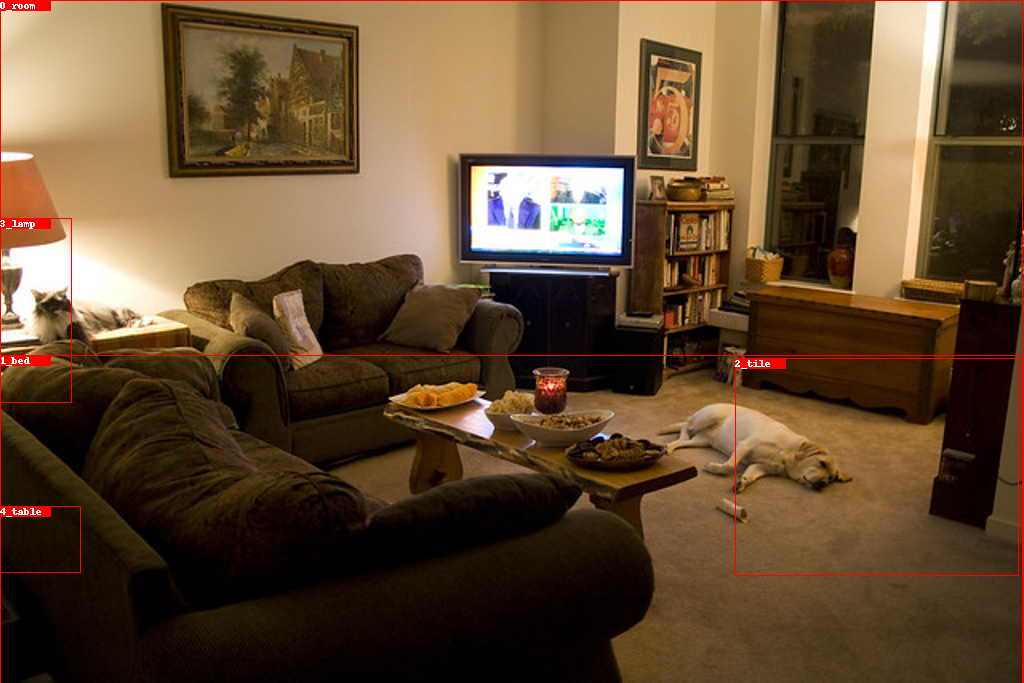

**************************************************
box_labels 0: room; score: 
box_labels 1: bed; score: 
box_labels 2: tile; score: 
box_labels 3: lamp; score: 
box_labels 4: table; score: 
**************************************************
rel_labels 0: ('above', '__background__'); score: 
rel_labels 1: ('across', '__background__'); score: 
rel_labels 2: ('along', '__background__'); score: 
rel_labels 3: ('against', '__background__'); score: 
rel_labels 4: ('along', 'above'); score: 
rel_labels 5: ('__background__', 'above'); score: 
rel_labels 6: ('__background__', 'across'); score: 
rel_labels 7: ('against', 'along'); score: 
rel_labels 8: ('against', 'above'); score: 
rel_labels 9: ('across', 'along'); score: 
rel_labels 10: ('above', 'across'); score: 
rel_labels 11: ('__background__', 'along'); score: 
rel_labels 12: ('across', 'above'); score: 
rel_labels 13: ('__background__', 'against'); score: 
rel_labels 14: ('above', 'along'); score: 
rel_labels 15: ('along', 'across'); sc

In [22]:
def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        

def print_list(name, input_list, scores=None, max_limit=10):
    for i, item in enumerate(input_list):
        if i > max_limit:
            return
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str())

def load_unscaled(fn):
    """ Loads and scales images so that it's 1024 max-dimension"""
    image_unpadded = Image.open(fn).convert('RGB')
    im_scale = 1024.0 / max(image_unpadded.size)

    image = image_unpadded.resize((int(im_scale * image_unpadded.size[0]), int(im_scale * image_unpadded.size[1])),
                                  resample=Image.BICUBIC)
    return image

def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None, max_lim=5):
    pic = load_unscaled(img_path)
    num_obj = len(boxes)
    for i in range(num_obj):
        if i+1 > max_lim:
            break
        info = str(i) + '_' + str(box_labels[i])
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores, max_lim)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores, max_lim)
    
    return None




def viz(i, max_lim=5):
    pred = get(f"./qualitative/{i}/")
    idx2lab = lambda c: translator['idx_to_label'][str(c)]
    idx2rel = lambda tup: (translator['idx_to_predicate'][str(tup[0])], translator['idx_to_predicate'][str(tup[1])])
    print(np.array(pred['data']['pred_boxes']).shape[0], 'boxes')
    draw_image(pred['img_path'], np.array(pred['data']['pred_boxes']), list(map(idx2lab, pred['data']['pred_classes'])), 
              list(map(idx2rel, pred['data']['pred_rel_inds'])), pred['data']['obj_scores'], pred['data']['rel_scores'], max_lim)

    
viz(15, 100)
